In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df.shape

(10000, 14)

In [14]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


The data have 10000 rows and 14 columns. 
There is no Missing value and null value in the dataset. 

In [16]:
print("Duplicates :", df.duplicated().sum())

Duplicates : 0


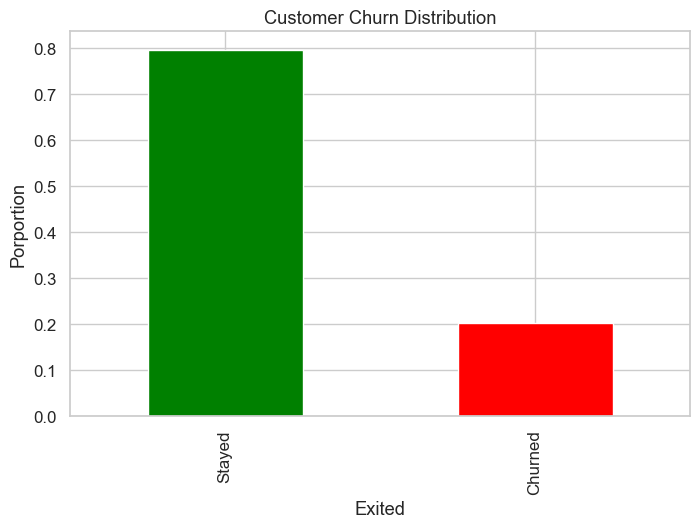

In [17]:
df['Exited'].value_counts(normalize=True).plot(kind='bar', color=['#008000','#FF0000'])
plt.title('Customer Churn Distribution')
plt.xticks([0,1],['Stayed', 'Churned'])
plt.ylabel('Porportion')
plt.show()

From the proportionality graph it can be observed that around 20% customers churn.

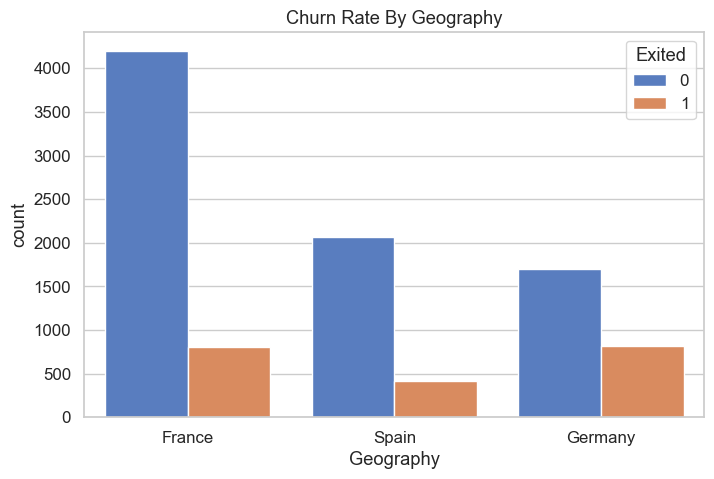

In [19]:
sns.countplot(data=df, x='Geography', hue='Exited')
plt.title("Churn Rate By Geography")
plt.show()

Germary have a higher churn rate than France and Spain. Whereas Spain has the lowest among the three.

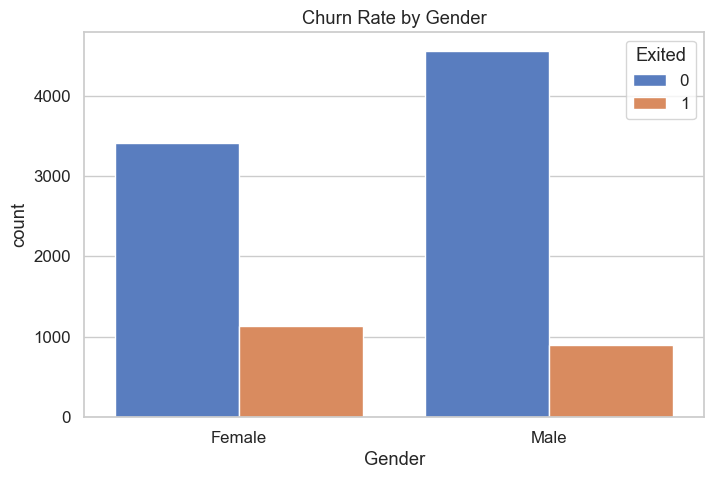

Gender
Female    0.250715
Male      0.164559
Name: Exited, dtype: float64

In [20]:
sns.countplot(data=df, x="Gender", hue='Exited')
plt.title('Churn Rate by Gender')
plt.show()
df.groupby('Gender')['Exited'].mean()

It is observed that the Churn Rate of Females is more than that of Males.

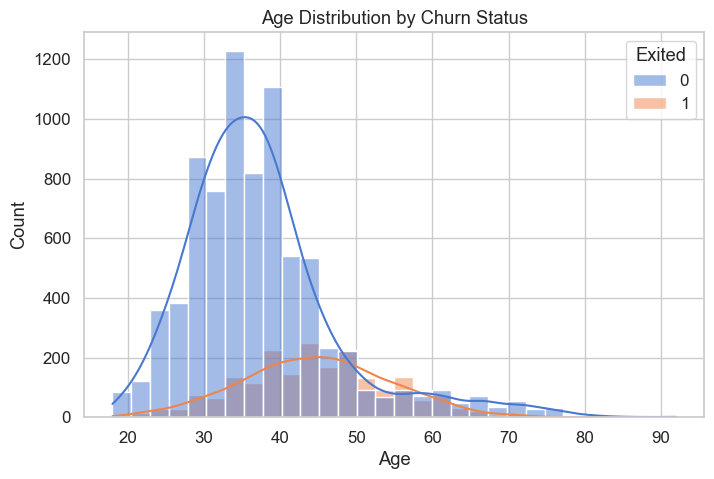

In [21]:
sns.histplot(df, x='Age', hue="Exited", kde=True, bins=30)
plt.title("Age Distribution by Churn Status")
plt.show()

It is observed that the churn rate rises sharply for customers in age range 40 to 50.

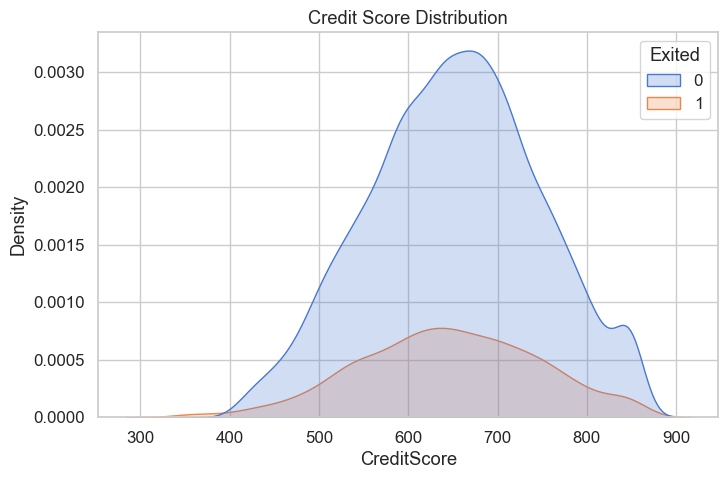

Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64

In [23]:
sns.kdeplot(data=df, x="CreditScore", hue="Exited", fill=True)
plt.title('Credit Score Distribution')
plt.show()
df.groupby('Exited')['CreditScore'].mean()

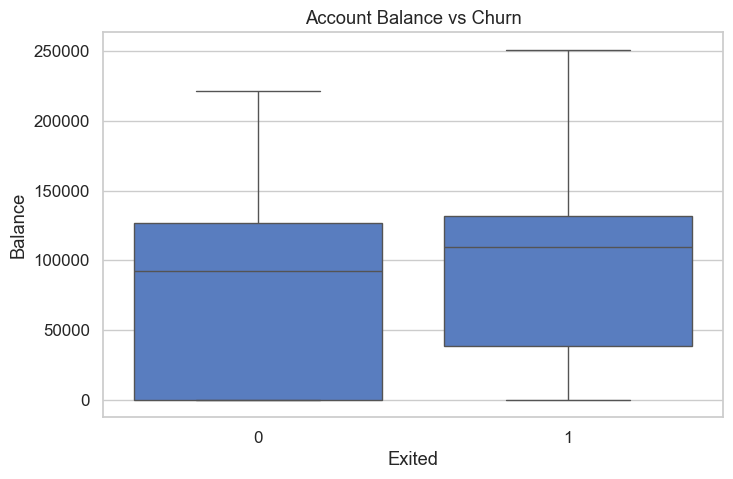

In [24]:
sns.boxplot(data=df, x="Exited", y="Balance")
plt.title('Account Balance vs Churn')
plt.show()

Churned customers often have moderate to high balances.

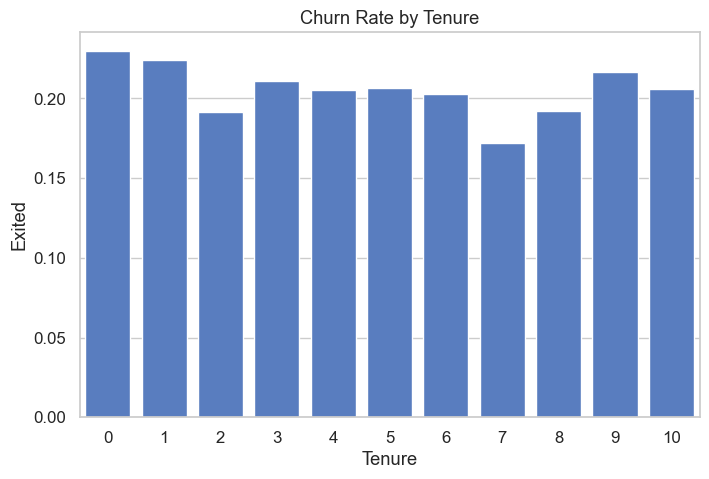

In [30]:
sns.barplot(data=df, x='Tenure', y='Exited', errorbar=None)
plt.title('Churn Rate by Tenure')
plt.show()

Lower Tenure results in higher churn.

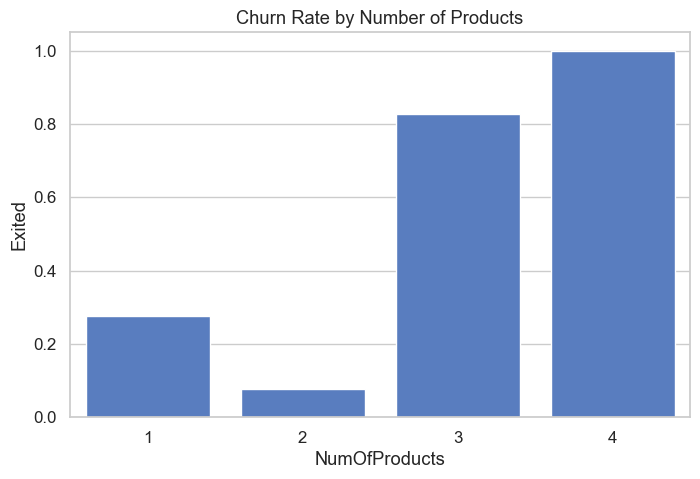

In [31]:
sns.barplot(data=df, x='NumOfProducts', y='Exited', errorbar=None)
plt.title('Churn Rate by Number of Products')
plt.show()

Customers who hold 3 or more products are at a significantly higher risk of churning.

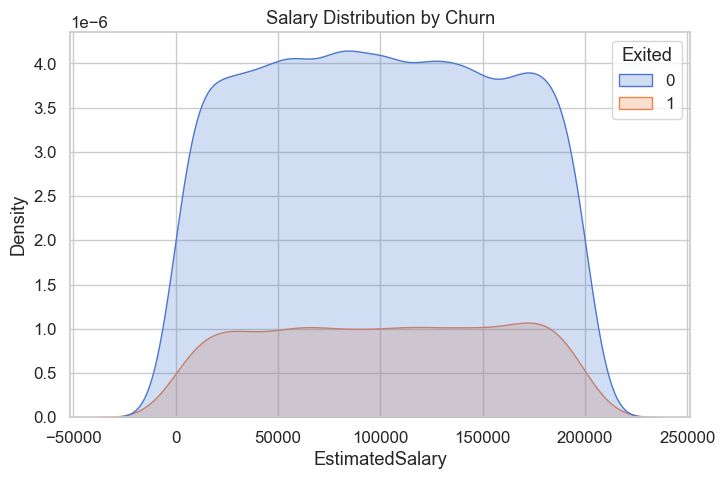

In [32]:
sns.kdeplot(data=df, x="EstimatedSalary", hue='Exited', fill=True)
plt.title('Salary Distribution by Churn')
plt.show()

No strong relationship between salary and exited 

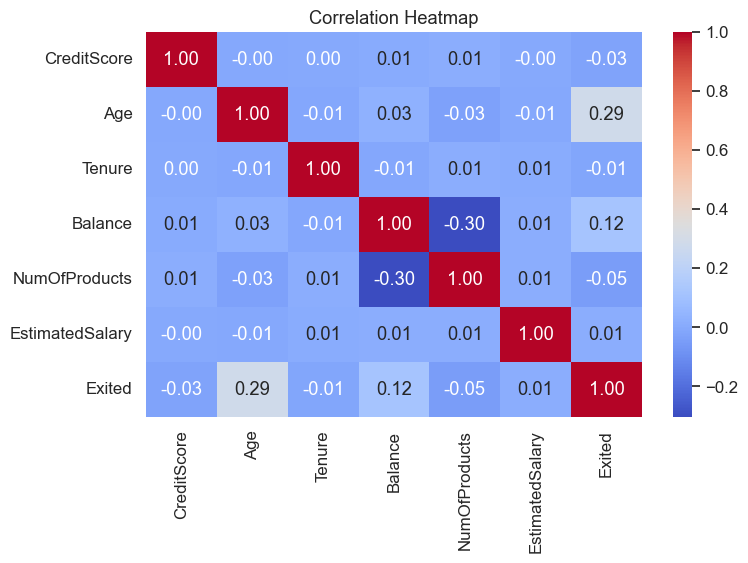

In [35]:
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']
corr = df[numeric_features].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

Age and Exited show moderate positive correlation.